In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('spam1.csv')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1925,ham,We don call like &lt;#&gt; times oh. No give...,NaN,NaN,NaN
4513,ham,"Sure, whenever you show the fuck up &gt;:(",NaN,NaN,NaN
2768,ham,I am on the way to ur home,NaN,NaN,NaN
2535,ham,Can you pls pls send me a mail on all you know...,NaN,NaN,NaN
1442,ham,"Its ok., i just askd did u knw tht no?",NaN,NaN,NaN


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#1.Data cleaning
#2.EDA
#3.Text Preprocessing
#4.Model Buliding
#5.Evaluation
#6.Improvemnt
#7.Website 8.Deploy


1.Data Cleaning 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
1011,ham,"I just got home babe, are you still awake ?"
2749,ham,You said not now. No problem. When you can. Le...
3629,spam,Get the official ENGLAND poly ringtone or colo...
2265,ham,I cant pick the phone right now. Pls send a me...
1159,ham,Yun buying... But school got offer 2000 plus o...


In [11]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
155,ham,Aaooooright are you at work?
3110,ham,Short But Cute : \ Be a good person
726,ham,Of cos can lar i'm not so ba dao ok... 1 pm lo...
561,ham,Thanx 4 e brownie it's v nice...
4139,ham,Leave it wif me lar... ÌÏ wan to carry meh so ...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

414

In [17]:
#remove duplicate
df=df.drop_duplicates(keep='first')
df.shape

(5158, 2)

2.EDA

In [18]:
 df['target'].value_counts()

0    4516
1     642
Name: target, dtype: int64

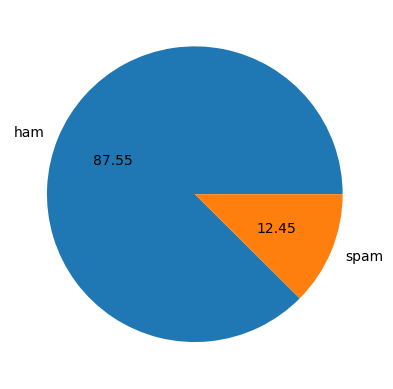

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
#Data is imbalance
import nltk
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
# ps.stem('loving')
from nltk.corpus import stopwords
#stopwords.words('english')

In [21]:
nltk.download('punkt')
#nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/anubhoyar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_char']=df['text'].apply(len)

In [23]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,5158.000000,5158.000000,5158.000000
mean,78.806708,18.427879,1.943777
std,58.187284,13.326938,1.358952
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#for ham msg
df[df['target']==0][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.449734,17.120903,1.799601
std,56.352902,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#for spam msg
df[df['target']==1][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,642.00000,642.000000,642.000000
mean,137.59190,27.621495,2.957944
std,30.29638,7.048863,1.472506
min,13.00000,2.000000,1.000000
25%,131.25000,25.000000,2.000000
50%,148.00000,29.000000,3.000000
75%,157.00000,32.000000,4.000000
max,224.00000,46.000000,8.000000


In [30]:
#spam msg are longer as caompare to ham msg
#plot histogram

In [31]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

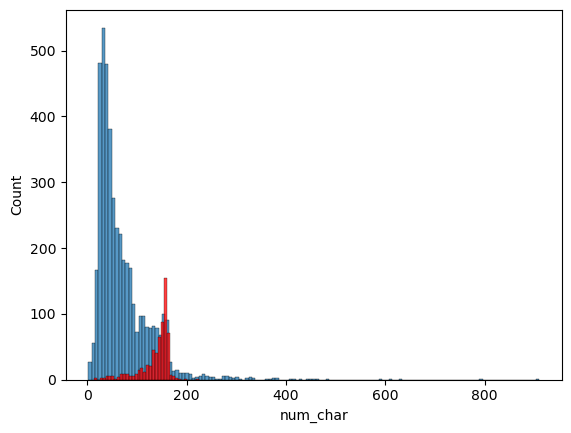

In [32]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

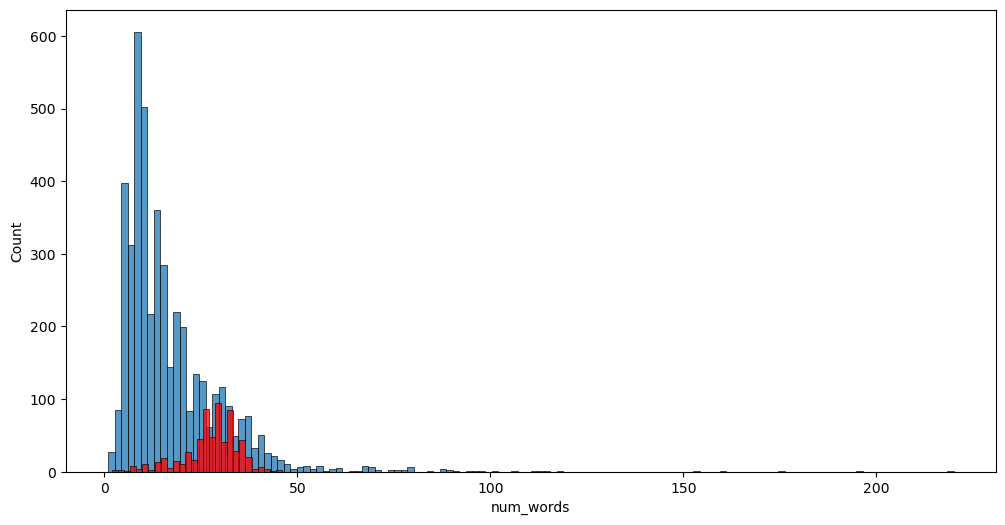

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

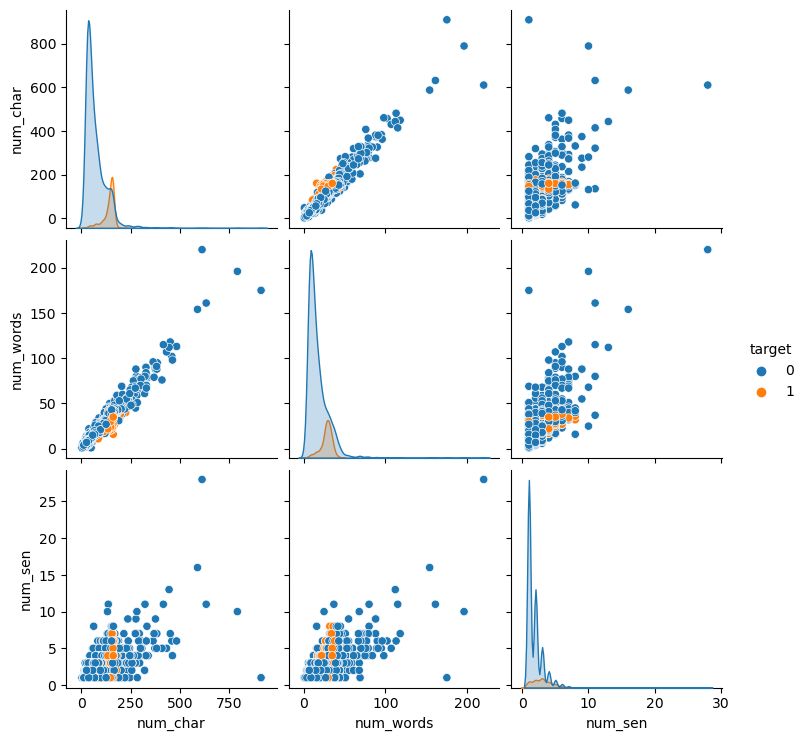

In [34]:
#some outliers are present
sns.pairplot(df,hue='target')

<Axes: >

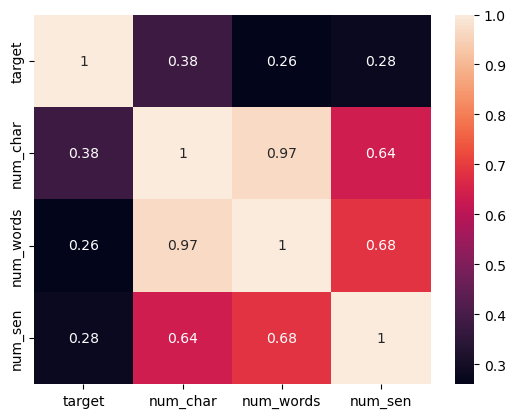

In [35]:
sns.heatmap(df.corr(),annot=True)

3.Data Preprocessing
  lower case,Tokenization,Removing special chars, removing stop words and   punctuation, stemming 

In [36]:
#from nltk.corpus import stopwords
#stopwords.words('english')
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [112]:
transform_text('Hi I am Nehita....hi How are you?')

'hi nehita hi'

In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_char,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
#spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

In [42]:
#plt.imshow(spam_wc)

In [43]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [44]:
len(spam_corpus)

9765

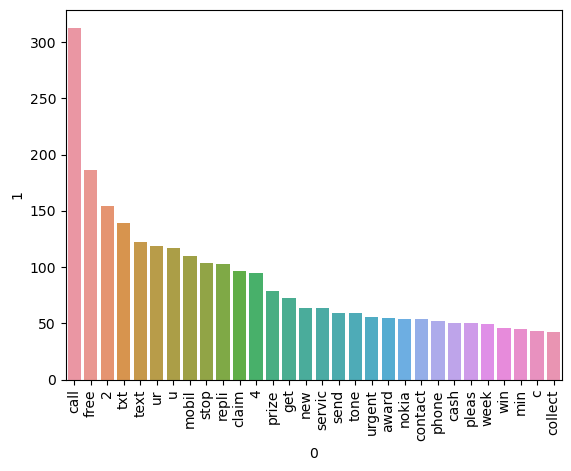

In [45]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35394

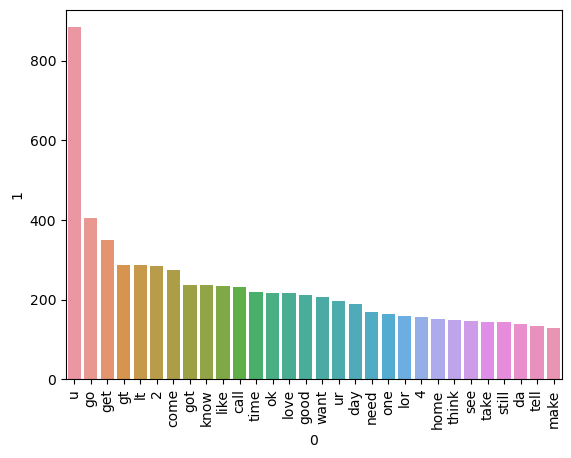

In [48]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4.Model Bulding

In [49]:
df.head()

,target,text,num_char,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [136]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [137]:
#covert space array to dense arry
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [138]:
X.shape


(5158, 3000)

In [139]:
y=df['target'].values

In [140]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [141]:
 from sklearn.model_selection import train_test_split   
 from sklearn.metrics import accuracy_score,confusion_matrix,precision_score   

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [143]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [144]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [145]:
gnb.fit(X_train,y_train)
y_predgnb=gnb.predict(X_test)
print(accuracy_score(y_test,y_predgnb))
print(confusion_matrix(y_test,y_predgnb))
print(precision_score(y_test,y_predgnb))

0.872093023255814
[[789 114]
 [ 18 111]]
0.49333333333333335


In [146]:
mnb.fit(X_train,y_train)
y_predmnb=mnb.predict(X_test)
print(accuracy_score(y_test,y_predmnb))
print(confusion_matrix(y_test,y_predmnb))
print(precision_score(y_test,y_predmnb))

0.9757751937984496
[[902   1]
 [ 24 105]]
0.9905660377358491


In [147]:
bnb.fit(X_train,y_train)
y_predbnb=bnb.predict(X_test)
print(accuracy_score(y_test,y_predbnb))
print(confusion_matrix(y_test,y_predbnb))
print(precision_score(y_test,y_predbnb))

0.9806201550387597
[[901   2]
 [ 18 111]]
0.9823008849557522


In [148]:
#tfidf with mnb is good with precision

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [150]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(C=1,solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [151]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [152]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [153]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9815891472868217, 1.0)

In [154]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)                                                 

For  SVC
Accuracy -  0.9815891472868217
Precision -  1.0
For  KN
Accuracy -  0.9137596899224806
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9757751937984496
Precision -  0.9905660377358491
For  DT
Accuracy -  0.9437984496124031
Precision -  0.8736842105263158
For  LR
Accuracy -  0.9563953488372093
Precision -  0.9565217391304348
For  RF
Accuracy -  0.9689922480620154
Precision -  0.9801980198019802
For  AdaBoost
Accuracy -  0.9670542635658915
Precision -  0.9439252336448598
For  Bgc
Accuracy -  0.9612403100775194
Precision -  0.8938053097345132
For  ETC
Accuracy -  0.9796511627906976
Precision -  1.0
For  GBDT
Accuracy -  0.9544573643410853
Precision -  0.9555555555555556
For  xgb
Accuracy -  0.9699612403100775
Precision -  0.9711538461538461


In [132]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [133]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906977,1.000000
2,NB,0.964147,1.000000
5,RF,0.972868,1.000000
8,ETC,0.970930,1.000000
0,SVC,0.973837,0.990385
10,xgb,0.968992,0.989899
9,GBDT,0.957364,0.977528
4,LR,0.953488,0.945055
6,AdaBoost,0.961240,0.915888
7,Bgc,0.961240,0.886957


In [134]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906977
1,NB,Accuracy,0.964147
2,RF,Accuracy,0.972868
3,ETC,Accuracy,0.970930
4,SVC,Accuracy,0.973837
5,xgb,Accuracy,0.968992
6,GBDT,Accuracy,0.957364
7,LR,Accuracy,0.953488
8,AdaBoost,Accuracy,0.961240
9,Bgc,Accuracy,0.961240


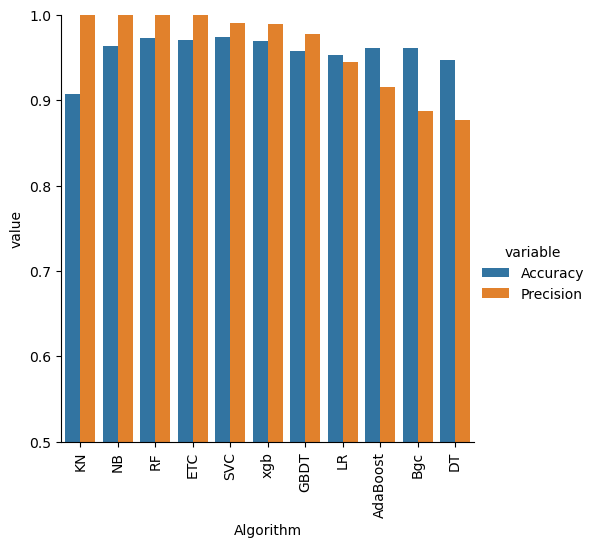

In [135]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
#improve model
#1.change max_feature for tfidf 

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [74]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [75]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [77]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.981589,1.000000,0.981589,1.000000,0.981589,1.000000,0.981589,1.000000
1,ETC,0.979651,1.000000,0.979651,1.000000,0.979651,1.000000,0.979651,1.000000
2,NB,0.975775,0.990566,0.975775,0.990566,0.975775,0.990566,0.975775,0.990566
3,RF,0.968992,0.980198,0.968992,0.980198,0.968992,0.980198,0.968992,0.980198
4,KN,0.913760,0.976190,0.913760,0.976190,0.913760,0.976190,0.913760,0.976190
5,xgb,0.969961,0.971154,0.969961,0.971154,0.969961,0.971154,0.969961,0.971154
6,LR,0.956395,0.956522,0.956395,0.956522,0.956395,0.956522,0.956395,0.956522
7,GBDT,0.954457,0.955556,0.954457,0.955556,0.954457,0.955556,0.954457,0.955556
8,AdaBoost,0.967054,0.943925,0.967054,0.943925,0.967054,0.943925,0.967054,0.943925
9,Bgc,0.961240,0.893805,0.961240,0.893805,0.961240,0.893805,0.961240,0.893805


In [78]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [106]:
input_sms='Accident Compensation you have still not claimed the compensation you are due for the accident you had. To start the process please reply Yes.To opt out text STOP.'
transformed_sms=transform_text(input_sms)
vector_input=tfidf.transform([transformed_sms])
result=mnb.predict(vector_input)[0]


In [109]:
if result==1:
    print('Spam',result)
else:
    print('Not Spam',result)


Spam 1


In [ ]:
max_features=3000